# Clustering Zona Covid 19
mengolah pemetaan zona covid 19 berdasarkan data timeseries covide_19_indonesia menjadi beberapa kluster

In [ ]:
# Import Library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
def normalize_data(df, columns):
    minMaxScaler = MinMaxScaler()
    df[columns] = minMaxScaler.fit_transform(d[columns])

In [ ]:
# Read the data
df = pd.read_csv('covid_19_indonesia_time_series_all.csv')

In [ ]:
# Mendefiniskan nama kolom dalam dataset agar memudahkan dalam proses pengkodean
class ColumnData:
    total_active_cases = 'Total Active Cases'
    population = 'Population'
    area = 'Area (km2)'
    mortality = 'Mortality'
    density = 'Population Density'
    new_cases ='New Cases'
    new_death = 'New Deaths'
    new_recovered = 'New Recovered'
    case_fatality_rate ='Case Fatality Rate'
    case_recovered_rate = 'Case Recovered Rate'

In [ ]:
# Memilih calon kolom  yang akan digunakan
df = df[[
    ColumnData.total_active_cases,
    ColumnData.density
]]
# Print the first 5 rows of the data
df.head()


,Total Active Cases,Population Density
0,430,16334.31
1,432,16334.31
2,2,138.34
3,2,1276.55
4,434,16334.31


In [ ]:
# Read the data
#Cek detail tiap kolom
df.describe()

,Total Active Cases,Population Density
count,7097.000000,7097.000000
mean,1641.676483,785.360072
std,5892.596123,2838.522255
min,-33.000000,8.590000
25%,44.000000,47.790000
50%,186.000000,103.840000
75%,953.000000,262.700000
max,66578.000000,16334.310000


In [ ]:
# Menghapus jika ada data yang kosong
df = df.dropna(axis=0, how="any")

In [ ]:
# jika adal null
df.isnull().sum()

Total Active Cases    0
Population Density    0
dtype: int64

In [ ]:
# hapus data duplikat
df.drop_duplicates()

,Total Active Cases,Population Density
0,430,16334.31
1,432,16334.31
2,2,138.34
3,2,1276.55
4,434,16334.31
...,...,...
7090,2413,201.78
7092,1154,69.23
7094,3647,131.37
7095,1289,89.72


In [ ]:
# Korelasi antar fitur
df.corr()

,Total Active Cases,Population Density
Total Active Cases,1.000000,0.119714
Population Density,0.119714,1.000000


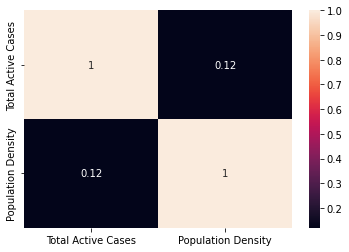

In [ ]:
# Plot Korelasi matrix
sns.heatmap(df.corr(), annot=True)

In [ ]:
#selecting features
X = df[[
    ColumnData.total_active_cases,
    ColumnData.density
]]

In [ ]:
# change name mortality, total_cases, total_active_cases, population, density_population, total_deaths
X = X.rename(columns={'Total Active Cases': 'total_active_cases', 'Population Density': 'density'})

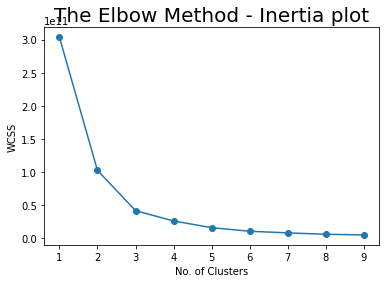

In [ ]:
#Elbow Method - Inertia plot
inertia = []
#looping the inertia calculation for each k
for k in range(1, 10):
    #Assign KMeans as cluster_model
    cluster_model = KMeans(n_clusters = k, random_state = 24)
    #Fit cluster_model to X
    cluster_model.fit(X)
    #Get the inertia value
    inertia_value = cluster_model.inertia_
    #Append the inertia_value to inertia list
    inertia.append(inertia_value)
##Inertia plot
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method - Inertia plot', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.935964793697032
For n_clusters = 3 The average silhouette_score is : 0.9107455361377905
For n_clusters = 4 The average silhouette_score is : 0.9130935236449648
For n_clusters = 5 The average silhouette_score is : 0.7967553318088337
For n_clusters = 6 The average silhouette_score is : 0.7714359428771537
For n_clusters = 7 The average silhouette_score is : 0.7693616418640195
For n_clusters = 8 The average silhouette_score is : 0.7155830685954669
For n_clusters = 9 The average silhouette_score is : 0.7086225108988835


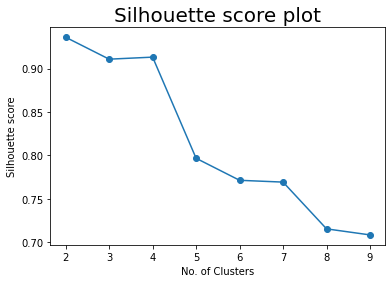

In [ ]:
from sklearn.metrics import silhouette_score

#Silhouette score plot
silhouette = []
#looping the silhouette score calculation for each k
for k in range(2, 10):
    #Assign KMeans as cluster_model
    cluster_model = KMeans(n_clusters = k, random_state = 24)
    #Fit cluster_model to X
    cluster_model.fit(X)
    #Get the silhouette score
    silhouette_avg = silhouette_score(X, cluster_model.labels_)
    #Append the silhouette_avg to silhouette list
    silhouette.append(silhouette_avg)

    #Print the silhouette score
    print("For n_clusters =", k, "The average silhouette_score is :", silhouette_avg)

##Silhouette score plot
plt.plot(range(2, 10), silhouette, marker='o')
plt.title('Silhouette score plot', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette score')
plt.show()

In [ ]:
# didapat silhoutte score paling baik ada di K = 4
# Fit the K-Means model with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
# Add new column to the data
X['Cluster'] = y_kmeans

In [ ]:
# Show the first 5 rows of the data
X

,total_active_cases,density,Cluster
0,430,16334.31,2
1,432,16334.31,2
2,2,138.34,0
3,2,1276.55,0
4,434,16334.31,2
...,...,...,...
7092,1154,69.23,0
7093,666,190.17,0
7094,3647,131.37,0
7095,1289,89.72,0


In [ ]:
# cluster mean
X.groupby('Cluster').mean()

,total_active_cases,density
Cluster,,
0,748.158723,279.06876
1,32162.474747,138.34000
2,5452.751111,16334.31000
3,57925.657895,138.34000


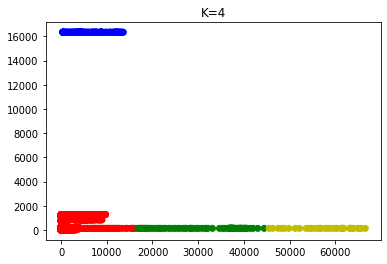

In [ ]:
y_pred = y_kmeans
plt.plot
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'g',
                   2 : 'b',
                   3 : 'y',}
label_color = [LABEL_COLOR_MAP[l] for l in y_pred]
plt.scatter(X['total_active_cases'], X['density'], c=label_color)
plt.title("K=4")
plt.show()

## K-Means dengan dataset buatan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples , silhouette_score
from sklearn.datasets import make_blobs

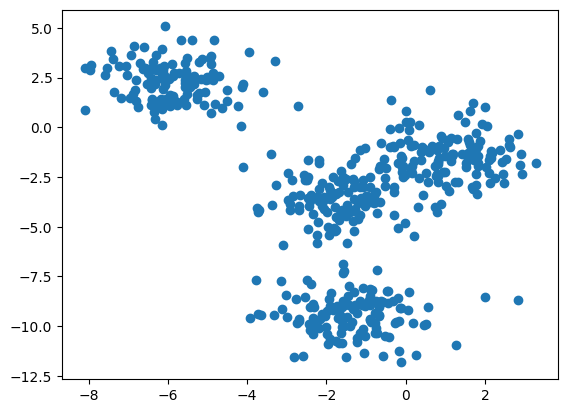

(500, 2)

In [ ]:
# Generating the sample data from make_blobs
X, y = make_blobs(n_samples=500,cluster_std=1,centers=4,n_features=2,
                  shuffle=True,center_box=(-10.0,10.0),random_state=2)
range_n_clusters = [2, 3, 4, 5, 6]
# Plotting the data
plt.scatter(X[:,0],X[:,1])
plt.show()
X.shape

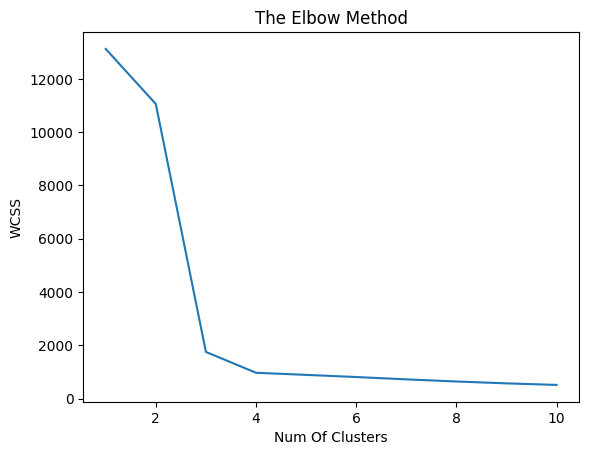

In [ ]:
WCSS =  [ ]
for i in range(1, 11):
    km = KMeans(n_clusters= i, init='k-means++', random_state=0)
    km.fit(X)
    WCSS.append(km.inertia_)

plt.plot(range(1,11),WCSS)
plt.title('The Elbow Method')
plt.xlabel('Num Of Clusters')
plt.ylabel('WCSS')
plt.show()

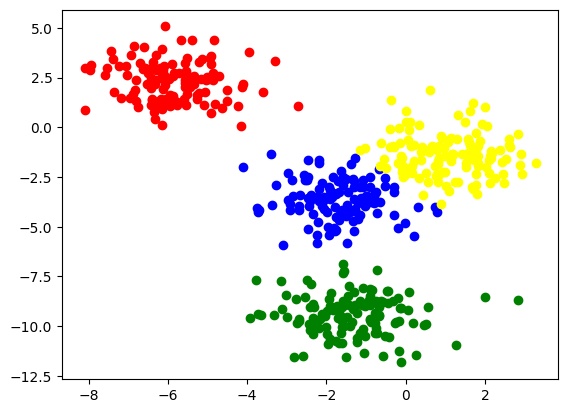

In [ ]:
clusterer = KMeans(n_clusters=4, random_state=10)
y_mean = clusterer.fit_predict(X)
plt.scatter(X[y_mean == 0,0],X[y_mean ==0,1], color='red')
plt.scatter(X[y_mean ==1,0], X[y_mean==1,1], color= 'blue')
plt.scatter(X[y_mean ==2,0], X[y_mean==2,1], color= 'green')
plt.scatter(X[y_mean ==3,0], X[y_mean==3,1], color= 'yellow')
plt.show()

In [ ]:
# Calculate silhouette score
print(f'Silhouette Score(n=4): {silhouette_score(X, y_mean)}')

Silhouette Score(n=4): 0.6250462156493074
